<a href="https://colab.research.google.com/github/DeleLinus/HFR-Analytics/blob/master/BigQuery_bquxjob_19a62f65_18b786d5620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'kagglexfinal' # Project ID inserted based on the query results selected to explore
location = 'us-central1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=kagglexfinal:us-central1:bquxjob_19a62f65_18b786d5620)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_19a62f65_18b786d5620') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT DISTINCT p.institution_key, i.facility_name, COALESCE(p.number_of_doctors, 0) AS number_of_doctors
FROM `kagglexfinal.hfr_dataset.factPersonnel` AS p
JOIN `kagglexfinal.hfr_dataset.dimInstitutions` AS i
ON p.`institution_key` = i.`institution_key`
LIMIT 1000;


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_19a62f65_18b786d5620') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,institution_key,facility_name,number_of_doctors
0,1,Ajegunle Health Post,0
1,4,Papa Ashafa Health Post,0
2,20,Neimeth Staff Clinic,1
3,23,Omoyeni Health Clinic,1
4,19,Methodist Church Clinic,1
5,26,Salam-Salam Nursing Home,1
6,30,"The Apostolic Church , Agege Area Medical Centre",2
7,31,The Grace Nursing Home,1
8,32,Tobi Convalescent Home,1
9,43,Meritland Nursing Home,2


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [5]:
results.set_index("institution_key", drop=True, inplace=True)
results.describe()

,number_of_doctors
count,60.0
mean,1.85
std,1.516296
min,0.0
25%,1.0
50%,2.0
75%,2.0
max,8.0


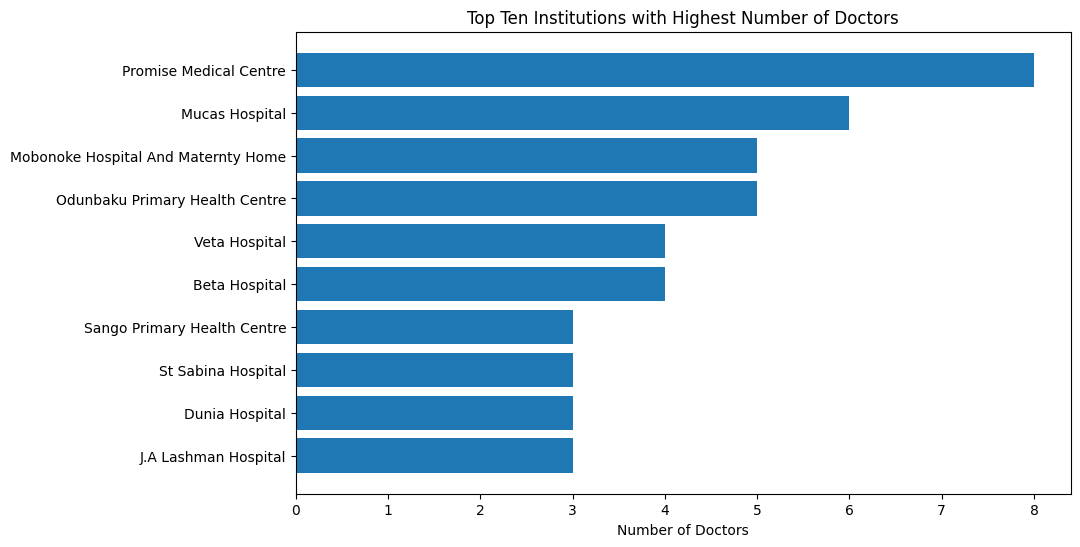

In [6]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'number_of_doctors' in descending order
df = results.sort_values(by='number_of_doctors', ascending=False)

# Select the top ten institutions
top_ten = df.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_ten['facility_name'], top_ten['number_of_doctors'])
plt.xlabel('Number of Doctors')
plt.title('Top Ten Institutions with Highest Number of Doctors')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest at the top

plt.show()